# Project: Wrangling and Analyze Data

### Import the necessary Libraries

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) and read it as csv

In [101]:
# Set the column width in pandas so the full tweet text can be read for analysis
pd.set_option("display.max_colwidth",280)
twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [102]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [103]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [104]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [105]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

2356

In [106]:
# Read the json turn text file and append it to an empty list to be converted to a dataframe  

import json

tweet_json_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
                
        tweet_json_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
tweet_json_df = pd.DataFrame(tweet_json_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])        

In [107]:
tweet_json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [108]:
tweet_json_df.to_csv('tweet_json.csv', index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment programmatic assessement to assess the data.

### Visual Assessment

In [109]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [110]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [111]:
tweet_json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessment

In [112]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> With the info method, we found out that columns such as `'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', and 'expanded_urls` have an incomplete dataset. 

> 'timestamp' is of type object instead of datetime datatype

In [113]:
twitter_archive_enhanced[twitter_archive_enhanced['retweeted_status_id'].notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None


> This filter out the number of retweets in the dataset. We have 181 retweets

In [114]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [115]:
twitter_archive_enhanced.duplicated().sum()

0

> There is no duplicated data in the entire dataset

In [116]:
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [117]:
twitter_archive_enhanced['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> With this, we found out that, there are some extreme and unrealistic rating_numerators, such as 420, 666, 960, etc

In [118]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


> A closer look to the dataset that has some extreme numerator made us know that majority of those numerator were incorrectly captured, either capturing the decimal part of a numerator, or not considering the factors of the numerator with respect to the denominator. 

In [119]:
twitter_archive_enhanced['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> With this, we found that some denominator has a value other than 10 which is the standard demoninator for the dataset

In [120]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> No null data in this dataset. The prediction column names are not properly described

In [121]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [122]:
image_predictions.duplicated().sum()

0

In [123]:
image_predictions['jpg_url'].duplicated().sum()

66

> jpg_url column has 66 duplicated data

In [124]:
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [125]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [126]:
tweet_json_df.duplicated().sum()

0

In [127]:
tweet_json_df.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
 
##### twitter_archive_enhanced

1. The null value on the doggo, floofer, pupper, and puppo column are recorded as none

2. Name of some dogs were not properly captured or not captured at all as some dogs were given names such as a, an, such, quite. Other unavailable names are recorded as None

3. There are 181 retweets data in the datasets to be removed

4. Some columns are not useful for analysis, most of it even contains large missing data (source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded url)

5. The rating denominator has some values not equal to 10 as 10 is the standard denominator

6. The rating numerator has some extreme values which seems unrealistic, like (420, 666, 182, 1776)

7. Other rating numerator were incorrectly captured due to having multiples of the numerators in tens or the decimal part of a decimal ratings

8. Timestamp was recorded as object instead of datetime datatype and tweet_id is int instead of string

##### image_predictions

9. tweet_id is int instead of string

10. jpg_url has 66 duplicated values

11. The predicted dog breed is not well defined, someone can struggle to know what p1, p2, or p3 is

12. The dog breed should have a consistence case format so that repeated breed can be capture without issue

##### tweet_json_df

13. tweet_id is int instead of string

### Tidiness issues

1. `twitter_archive_enhanced` - The classes of the dogs in (doggo, floofer, pupper, puppo) was recorded on separate column instead of one column for the class of dogs and some dogs has more than one classification

2. `image_predictions` - Prediction 1 has the highest confidence level, then we can drop other predictions with their correspondence.

3. The three datasets can be combined into one data.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [128]:
# Make copies of original pieces of data
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_df_clean = tweet_json_df.copy()

### Quality

#### Issue #1: `twitter_archive_enhanced` - The null value on the doggo, floofer, pupper, and puppo column are recorded as none

#### Define: 
Replace all the none in the dataset column to NaN using np.NaN to be captured as empty data instead of none as a string

#### Code

In [129]:
# Confirm that the column has no null values
twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].isnull().sum()

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [130]:
import numpy as np

twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.NaN)

#### Test

In [131]:
twitter_archive_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].isnull().sum()

doggo      2259
floofer    2346
pupper     2099
puppo      2326
dtype: int64

In [132]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


#### Issue #2: `twitter_archive_enhanced` - Name of some dogs were not properly captured or not captured at all as some dogs were given names such as a, an, such, quite. Other unavailable names are recorded as None

#### Define

Find the list of incorrect names using value counts and replace all with NaN if there are not many

#### Code

In [133]:
incorrect_names = twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean['name'].str.islower()) | (twitter_archive_enhanced_clean['name'] == 'None')]

incorrect_names['name'].value_counts()

None            745
a                55
the               8
an                7
very              5
one               4
just              4
quite             4
not               2
mad               2
getting           2
actually          2
this              1
life              1
space             1
by                1
infuriating       1
incredibly        1
my                1
officially        1
light             1
all               1
old               1
his               1
such              1
unacceptable      1
Name: name, dtype: int64

>The shows that there are 109 lower case names and 745 names recorded as None. making 854 incorrect names in total

In [134]:
list_ = incorrect_names['name'].value_counts().index.tolist()
# Replace all this datas with NaN 
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace(list_, np.NaN)

#### Test

In [135]:
twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean['name'].str.islower()) | (twitter_archive_enhanced_clean['name'] == 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [136]:
twitter_archive_enhanced_clean['name'].isnull().sum()

854

#### Issue #3: There are 181 retweets data in the datasets to be removed

#### Define

Drop this rows from the dataset

#### Code

In [137]:
twitter_archive_enhanced_clean.drop(twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].notnull()].index, inplace = True)

#### Test

In [138]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [139]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1391 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

#### Issue #4: `twitter_archive_enhanced` - Some columns are not useful for analysis, most of it even contains large missing data (source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded url)

#### Define

Drop this variables since they are not useful for analysis and also has plenty missing data 

#### Code

In [140]:
# Drop these columns from the twitter_archive_enhanced_clean dataframe

twitter_archive_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls'], axis =1, inplace = True)

#### Test

In [141]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Issue #5: `twitter_archive_enhanced` - The rating denominator has some values not equal to 10 as 10 is the standard denominator

#### Define

Replace value not equal to 10 with 10 as 10 is the standard denominator

#### Code

In [142]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_denominator'] !=10, 'rating_denominator'] = 10

#### Test

In [143]:
twitter_archive_enhanced_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [144]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


#### Issue #6: `twitter_archive_enhanced`  - The rating numerator has some extreme values which seems unrealistic, like (420, 666, 182, 1776)

#### Define

Replace the extreme ratings with the average of the numerators in its integer form

#### Code

In [145]:
average = twitter_archive_enhanced_clean['rating_numerator'].mean().astype(int)

twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 420, 'rating_numerator'] = average
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 666, 'rating_numerator'] = average
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 182, 'rating_numerator'] = average
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 420, 'rating_numerator'] = average
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 810984652412424192, 'rating_numerator'] = average
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['rating_numerator'] == 1776, 'rating_numerator'] = average

#### Test

In [146]:
twitter_archive_enhanced_clean['rating_numerator'].value_counts()

12     500
10     442
11     426
13     313
9      156
8       98
7       54
14      43
5       36
6       32
3       19
4       17
2        9
1        8
0        2
80       1
20       1
26       1
44       1
50       1
60       1
165      1
84       1
88       1
144      1
143      1
960      1
15       1
17       1
27       1
45       1
75       1
99       1
121      1
204      1
Name: rating_numerator, dtype: int64

#### Issue #7: `twitter_archive_enhanced` Other rating numerator were incorrectly captured due to having multiples of the numerators in tens or the decimal part of a decimal ratings

#### Define

Identify the incorrectly captured numerator and manually replace them with the correct ratings (approximate the decimal ratings to whole number)

In [147]:
twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


#### Code

In [148]:
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 835246439529840640, 'rating_numerator'] = 13
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 832215909146226688, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 820690176645140481, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 758467244762497024, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 731156023742988288, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 716439118184652801, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 713900603437621249, 'rating_numerator'] = 9
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 710658690886586372, 'rating_numerator'] = 10
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 709198395643068416, 'rating_numerator'] = 9
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 704054845121142784, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 697463031882764288, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 684225744407494656, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 684222868335505415, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 682808988178739200, 'rating_numerator'] = 8
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 677716515794329600, 'rating_numerator'] = 12
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 682808988178739200, 'rating_numerator'] = 8
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean['tweet_id'] == 675853064436391936, 'rating_numerator'] = 11

#### Test

In [149]:
twitter_archive_enhanced_clean['rating_numerator'].value_counts()

12    504
10    444
11    434
13    314
9     158
8      99
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
0       2
15      1
17      1
Name: rating_numerator, dtype: int64

#### Issue #8: `twitter_archive_enhanced` Timestamp was recorded as object instead of datetime datatype and tweet_id is int instead of string

#### Define

Change the Timestamp datatype to datetime and tweet_id to string

#### Code

In [150]:
twitter_archive_enhanced_clean['tweet_id'] = twitter_archive_enhanced_clean['tweet_id'].astype(str)
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'])

#### Test

In [151]:
twitter_archive_enhanced_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Issue #9: `image_predictions`: tweet_id is int instead of string

#### Define

Convert the int to string with astype(str)

#### Code

In [152]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [153]:
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

#### Issue #10: `image_predictions` - jpg_url has 66 duplicated values

#### Define

Drop the 66 duplicated values

#### Code

In [154]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='first')

#### Test

In [155]:
image_predictions_clean.duplicated().sum()

0

#### Issue #11: `image_predictions` - The predicted dog breed is not well defined, someone can struggle to know what p1, p2, or p3 is

#### Define

Rename the image predictions column to a well define name such as 1st_prediction, 2nd_prediction, etc

#### Code

In [156]:
image_predictions_clean.rename(columns={'p1':'1st_prediction', 'p1_conf': '1st_pred_confidence', 'p1_dog': '1st_dog',
                                  'p2': '2nd_prediction', 'p2_conf': '2nd_pred_confidence', 'p2_dog': '2nd_dog',
                                  'p3': '3rd_prediction', 'p3_conf': '3rd_pred_confidence', 'p3_dog': '3rd_dog'}, inplace = True)

#### Test

In [157]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_prediction',
       '1st_pred_confidence', '1st_dog', '2nd_prediction',
       '2nd_pred_confidence', '2nd_dog', '3rd_prediction',
       '3rd_pred_confidence', '3rd_dog'],
      dtype='object')

#### Issue #12: `image_predictions` - The dog breed prediction should have a consistence case format so that repeated breed predictions can be capture without issue

#### Define

Change all the breed prediction to lower case for consistency

#### Code

In [158]:
image_predictions_clean['1st_prediction'] = image_predictions_clean['1st_prediction'].str.lower()
image_predictions_clean['2nd_prediction'] = image_predictions_clean['2nd_prediction'].str.lower()
image_predictions_clean['3rd_prediction'] = image_predictions_clean['3rd_prediction'].str.lower();

#### Test

In [159]:
image_predictions_clean['1st_prediction'].str.isupper().sum()

0

In [160]:
image_predictions_clean['2nd_prediction'].str.isupper().sum()

0

In [161]:
image_predictions_clean['3rd_prediction'].str.isupper().sum()

0

#### Issue #13: `tweet_json_df`: tweet_id is int instead of string

#### Define

Convert the int to string with astype(str)

#### Code

In [162]:
tweet_json_df_clean['tweet_id'] = tweet_json_df_clean['tweet_id'].astype(str)

#### Test

In [163]:
tweet_json_df_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

### Tidiness

#### Issue #1: `twitter_archive_enhanced` - The classes of the dogs in (doggo, floofer, pupper, puppo) was recorded on separate column instead of one column for the class of dogs and some dogs has more than one classification

#### Define

Create a new column to combine the 4 columns together after changing the null values to a space and then drop the 4 columns 

#### Code

In [164]:
# Replace all the NaN values to "" using for loop

dog_stage = ['doggo', 'floofer', 'pupper', 'puppo' ]
for stage in dog_stage:
        twitter_archive_enhanced_clean[stage] = twitter_archive_enhanced_clean[stage].replace(np.nan, '')

In [165]:
# Concatenate the four variables together and keep it in a variable named dog_stage
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['doggo']+twitter_archive_enhanced_clean['floofer']+twitter_archive_enhanced_clean['pupper']+twitter_archive_enhanced_clean['puppo']

In [166]:
# Drop the other four dog stage column
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)
twitter_archive_enhanced_clean['dog_stage'] = twitter_archive_enhanced_clean['dog_stage'].replace('', np.nan)

#### Test

In [167]:
twitter_archive_enhanced_clean['dog_stage'].value_counts() 

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [168]:
twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN


#### Issue #2: `image_predictions` - Prediction 1 has the highest confidence level, then we can drop other predictions with their correspondence.

#### Define

Drop the other two predictions and their corresponding breed name and its predicted dog

#### Code

In [169]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_prediction',
       '1st_pred_confidence', '1st_dog', '2nd_prediction',
       '2nd_pred_confidence', '2nd_dog', '3rd_prediction',
       '3rd_pred_confidence', '3rd_dog'],
      dtype='object')

In [170]:
image_predictions_clean.drop(['2nd_prediction',
       '2nd_pred_confidence', '2nd_dog', '3rd_prediction',
       '3rd_pred_confidence', '3rd_dog'], axis =1, inplace = True)

#### Test

In [171]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,1st_prediction,1st_pred_confidence,1st_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True


#### Issue #3. The three datasets can be combined into one data.

#### Define

Merge image_predictions_clean and the tweet_json_df_clean to twitter_archive_enhanced_clean

In [172]:
twitter_archive_master = twitter_archive_enhanced_clean.merge(image_predictions_clean, 
                                                              how = 'left', on = ['tweet_id']).merge(tweet_json_df_clean, how = 'left', on = ['tweet_id'])
#Keep only the rows that have pictures
twitter_archive_master = twitter_archive_master[twitter_archive_master['jpg_url'].notnull()]

In [173]:
twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,1st_prediction,1st_pred_confidence,1st_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,9774,41048


In [174]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id               1994 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
rating_numerator       1994 non-null int64
rating_denominator     1994 non-null int64
name                   1350 non-null object
dog_stage              306 non-null object
jpg_url                1994 non-null object
img_num                1994 non-null float64
1st_prediction         1994 non-null object
1st_pred_confidence    1994 non-null float64
1st_dog                1994 non-null object
retweet_count          1994 non-null int64
favorite_count         1994 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 233.7+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [175]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [176]:
# Read the twitter archive master data
twitter = pd.read_csv('twitter_archive_master.csv')

In [177]:
twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,1st_prediction,1st_pred_confidence,1st_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,9774,41048


#### The most popular breed of dog

In [178]:
# The top 10 breed of dogs based on the prediction
breed_rank = twitter['1st_prediction'].value_counts()[0:10]
breed_rank

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
pomeranian             38
toy_poodle             38
malamute               29
Name: 1st_prediction, dtype: int64

> The analysis shows that golden_retriever is the most popular breed with 139 samples

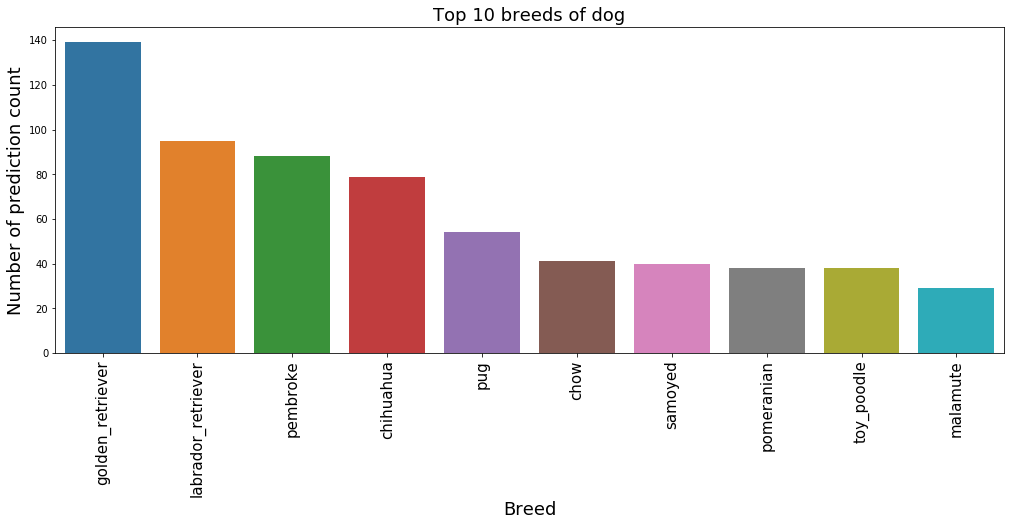

In [179]:
index = breed_rank.index
breed = breed_rank.sort_values(ascending = False)

plt.figure(figsize = (17,6))
sns.barplot(x = index, y = breed_rank)
plt.title("Top 10 breeds of dog", fontsize = 18)
plt.xlabel("Breed", fontsize = 18)
plt.ylabel("Number of prediction count", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 15);

In [180]:
# Analyzing the golden_retriever breed with respect to other column

golden_retriever = twitter[twitter['1st_prediction'] == 'golden_retriever']
golden_retriever.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,1st_prediction,1st_pred_confidence,1st_dog,retweet_count,favorite_count
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,13,10,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,golden_retriever,0.953442,True,2321,15359
16,888917238123831296,2017-07-23 00:22:39,This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,12,10,Jim,NaN,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1.0,golden_retriever,0.714719,True,4709,29611
17,888804989199671297,2017-07-22 16:56:37,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,13,10,Zeke,NaN,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1.0,golden_retriever,0.469760,True,4559,26080
39,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082,True,10407,46860
41,883117836046086144,2017-07-07 00:17:54,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",13,10,NaN,NaN,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2.0,golden_retriever,0.949562,True,6949,37914


In [181]:
# Confirming the highest rating that golden_retriever received 
golden_retriever['rating_numerator'].value_counts()

12    54
13    29
11    25
10    20
9      6
14     2
8      2
5      1
Name: rating_numerator, dtype: int64

> Majority of the golden_retriever received rating of 12/10, 2 of them received a rating of 14/10

#### golden_retriever dog breed with the highest rating

In [182]:
golden_retriever[golden_retriever['rating_numerator'] == 14]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,1st_prediction,1st_pred_confidence,1st_dog,retweet_count,favorite_count
275,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14,10,NaN,NaN,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1.0,golden_retriever,0.649209,True,1544,10467
399,807621403335917568,2016-12-10 16:22:02,This is Ollie Vue. He was a 3 legged pupper on a mission to overcome everything. This is very hard to write. 14/10 we will miss you Ollie https://t.co/qTRY2qX9y4,14,10,Ollie,pupper,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3.0,golden_retriever,0.873233,True,4288,16236


> The golden_retriever dogs with the highest rating of 14/10 are not with the highest like and retweet count. This shows that having a high ratings doesn't guarantee high number of count and retweet 

In [183]:
from PIL import Image
from io import BytesIO

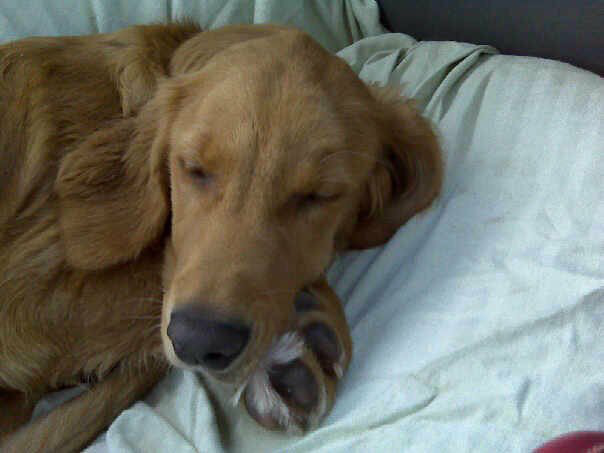

In [184]:
url1 = 'https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg'
r1 = requests.get(url1)
Image.open(BytesIO(r1.content))

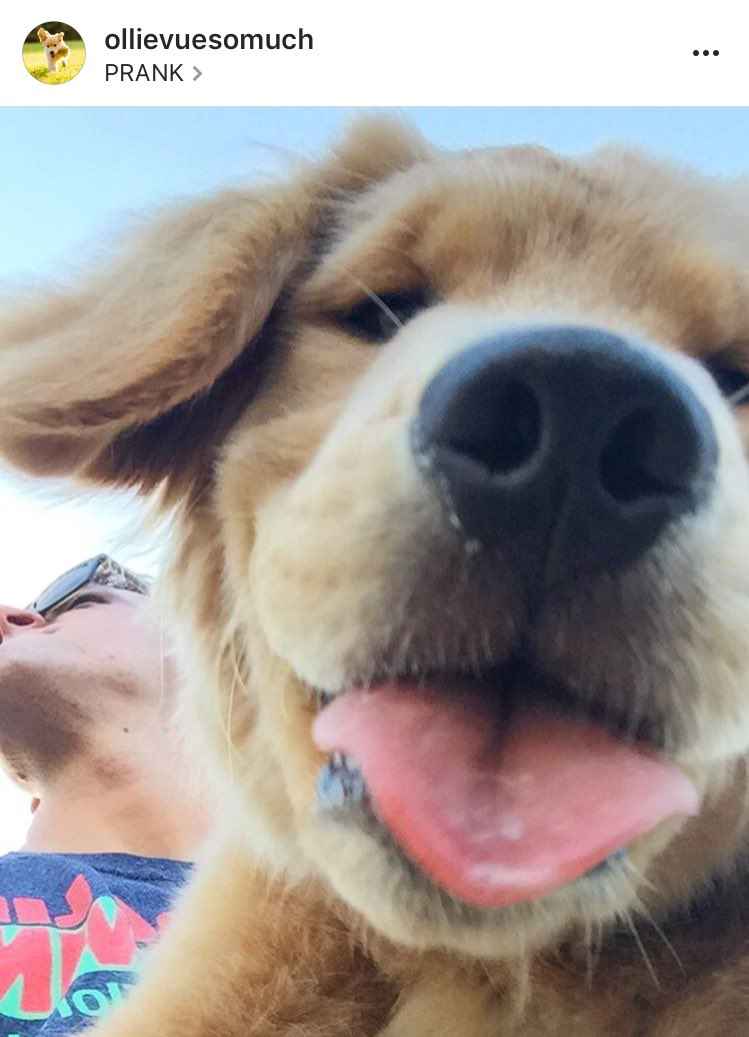

In [185]:
url2 = 'https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg'
r2 = requests.get(url2)
Image.open(BytesIO(r2.content))

#### Correlation between some of the variables

In [186]:
# Lets check the correction between the favorite count, retweet count, and rating numerator
rating_count_corr = twitter[['rating_numerator', 'favorite_count', 'retweet_count']].corr()
rating_count_corr

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.401933,0.299980
favorite_count,0.401933,1.000000,0.912947
retweet_count,0.299980,0.912947,1.000000


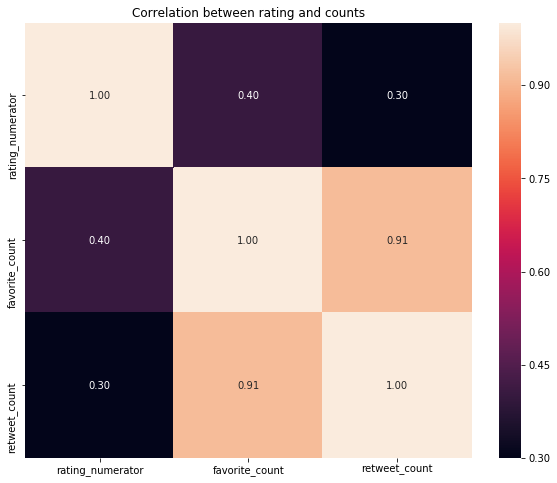

In [187]:
plt.figure(figsize = (10,8))
plt.title('Correlation between rating and counts')
sns.heatmap(rating_count_corr, annot=True, fmt= '.2f')

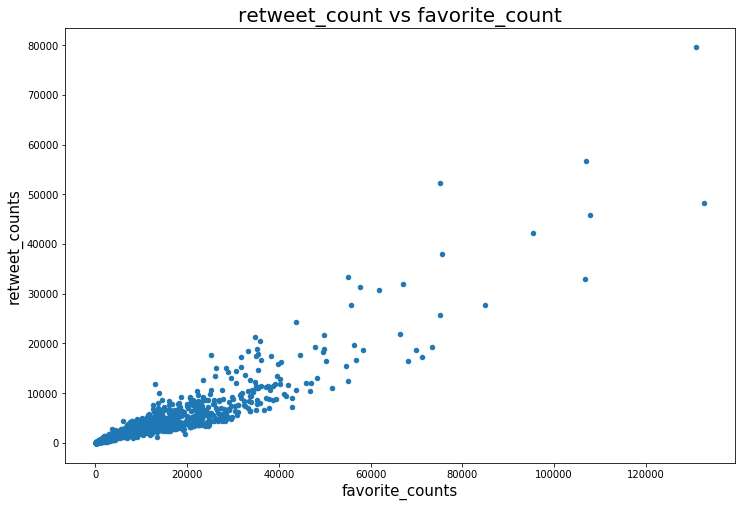

In [188]:
# Retweet_count vs Favorite_count
twitter.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', figsize=(12,8))
plt.xlabel('favorite_counts',fontsize = 15)
plt.ylabel('retweet_counts', fontsize = 15)
plt.title('retweet_count vs favorite_count', fontsize = 20);

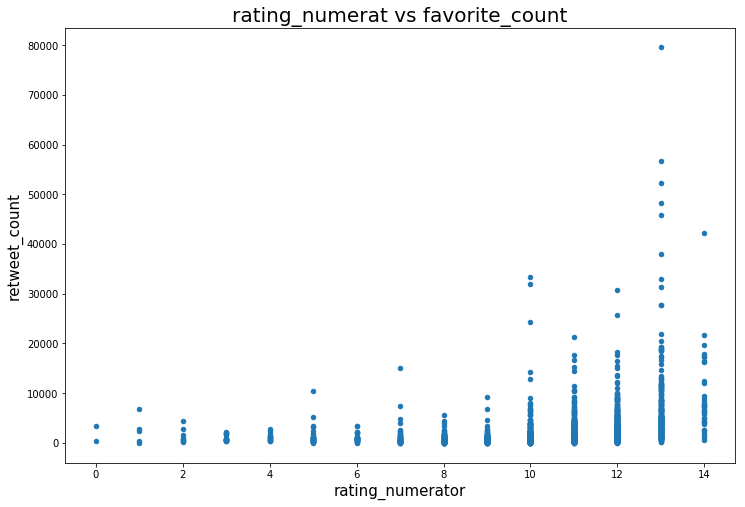

In [189]:
# Retweet_count vs Rating_numerator
twitter.plot(kind = 'scatter', x = 'rating_numerator', y = 'retweet_count', figsize=(12,8))
plt.xlabel('rating_numerator',fontsize = 15)
plt.ylabel('retweet_count', fontsize = 15)
plt.title('rating_numerat vs favorite_count', fontsize = 20);

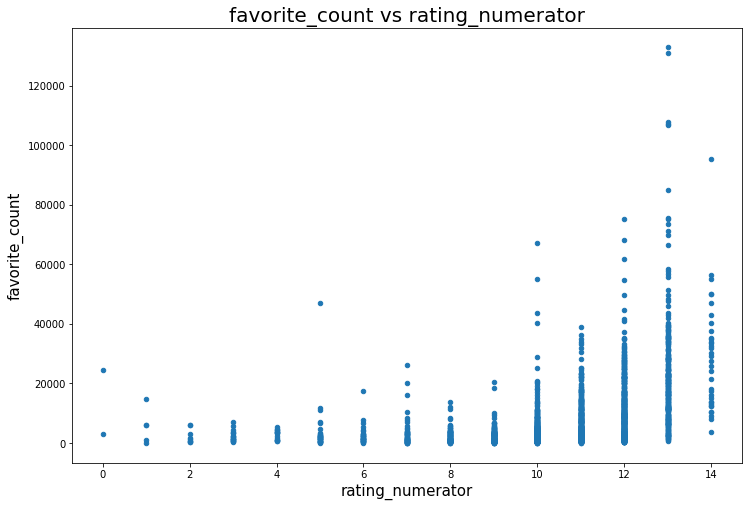

In [190]:
# Retweet_count vs Rating_numerator
twitter.plot(kind = 'scatter', x = 'rating_numerator', y = 'favorite_count', figsize=(12,8))
plt.xlabel('rating_numerator',fontsize = 15)
plt.ylabel('favorite_count', fontsize = 15)
plt.title('favorite_count vs rating_numerator', fontsize = 20);

> From the above analysis, we found out that there is a strong positive correction (0.91) between the favorite count and the retweet count, which means that the value of favorite count would likely determine how high or low the retweet count. However, there is a weak correlation between these counts and the dog ratings (0.4 and 0.3 respectively) i.e the outcome of counts does not necessarily determined by how high or low the rating is.

### Insights:

1. According to the predictions analysis, it was found that golden_retriever is the most popular breed with 139 samples majority of which received ratings of 12/10 (54 out of 139), only 2 of the golden_retriever received rating of 14/10

2. The dogs with the highest rating 15/10 was predicted not to be dog. For this reason, it has 0 favorite count and 38 retweet count

3. There is a strong correction between the favorite count and retweet count (0.91). However there is a weak correction (0.3 and 0.4) between these counts and the dog rating